<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/week03/ej4skylines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skylines

In [0]:
def skylines(buildings):
    def getPoliline(i):
        g, h, d = buildings[i]
        return [(g, h), (d, 0)]

    def add(res, tpl):
        if len(res)>0:
            if res[-1][1] == tpl[1]:
                return
            if res[-1][0] == tpl[0]:
                res[-1] = (res[-1][0], max(res[-1][1], tpl[1]))
                return
        res.append(tpl)

    def merge(pl1, pl2):
        # print(pl1, pl2)
        res = []
        i, j = 0, 0
        n, m = len(pl1), len(pl2)
        hleft, hright = 0, 0
        while i < n or j < m:
            if j >= m or i < n and pl1[i][0] < pl2[j][0]:
                x, hleft = pl1[i]
                i += 1
            else:
                x, hright = pl2[j]
                j += 1
            hmax = max(hleft, hright)
            add(res, (x, hmax))
        # print(res)
        return res

    def dc(i, f):
        if i == f:
            return getPoliline(i)
        else:
            m = (i + f) // 2
            return merge(dc(i, m), dc(m + 1, f))

    return dc(0, len(buildings) - 1)

In [42]:
polyline = skylines([(3, 13, 9), (1, 11, 5), (19, 18, 22),
                     (3, 6, 7), (16, 3, 25), (12, 7, 16)])
print(polyline)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


Resultado esperado:
```
[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]
```

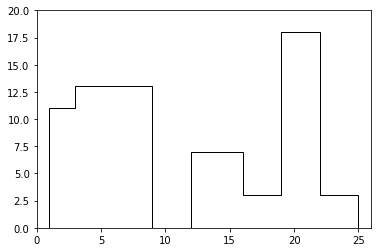

In [47]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

points = [(0, 0)]
for i in range(len(polyline)):
    points.append((polyline[i][0], points[-1][1]))
    points.append(polyline[i])


n = len(points)
codes = [Path.LINETO]*n
codes[0] = Path.MOVETO
#codes[-1] = Path.CLOSEPOLY

path = Path(points, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='white', lw=1)
ax.add_patch(patch)
#plt.axis('off')
ax.set_xlim(0,26)
ax.set_ylim(0,20)
plt.show()